In [1]:
import pandas as pd

import json
from pprint import pprint

#Use gensim, which remove stop words, short words(<3 letters), puncts and do stemming
from gensim.parsing.preprocessing import preprocess_documents
from gensim.parsing.preprocessing import preprocess_string


from collections import Counter
import numpy as np


from gensim.models import AuthorTopicModel
from gensim.corpora import mmcorpus
from gensim.test.utils import common_dictionary, datapath, temporary_file

from gensim import corpora

import pickle
import logging

import numpy as np
import matplotlib
import json 
import pickle as pkl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from lib.ATM import ATM,get_top_words
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

/home/yicheng/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Results

In [3]:
with open('ATM_results.pkl','rb') as file:
    res=pkl.load(file)

In [4]:
result=pd.DataFrame(np.array(res[1:-1]))

In [5]:
col_names=['n_doc','n_topic','n_vocab','max_iter','rf all topics ','NN red all topics ','NN blue all topics ','rf union topics ',
'NN red union topics ','NN blue union topics ','rf red topics ','NN red red topics ','NN blue red topics ',
'rf blue topics ','NN red blue topics ','NN blue blue topics ']

In [26]:
result.columns=col_names

In [27]:
result[result.max_iter==30].groupby(['n_doc']).mean()

,n_topic,n_vocab,max_iter,rf all topics,NN red all topics,NN blue all topics,rf union topics,NN red union topics,NN blue union topics,rf red topics,NN red red topics,NN blue red topics,rf blue topics,NN red blue topics,NN blue blue topics
n_doc,,,,,,,,,,,,,,,
62800.0,300.0,13140.0,30.0,0.626446,0.626446,0.547107,0.685950,0.633058,0.530579,0.689256,0.626446,0.487603,0.570248,0.517355,0.583471
73730.0,300.0,14542.0,30.0,0.619835,0.606612,0.580165,0.685950,0.573554,0.560331,0.656198,0.649587,0.500826,0.580165,0.494215,0.593388
90029.0,300.0,16771.0,30.0,0.629752,0.586777,0.593388,0.682645,0.593388,0.566942,0.656198,0.672727,0.438017,0.685950,0.451240,0.659504
117729.0,300.0,20269.0,30.0,0.682645,0.709091,0.537190,0.719008,0.712397,0.497521,0.728926,0.738843,0.411570,0.676033,0.550413,0.586777
175313.0,300.0,27390.0,30.0,0.666116,0.702479,0.563636,0.702479,0.699174,0.504132,0.672727,0.719008,0.365289,0.705785,0.487603,0.639669


In [29]:
# result

## Results End

In [12]:

with open('states.pkl','rb') as file:
    states=pkl.load(file)
for pair in states.items():
    states[pair[0]]=pair[1].lower()

In [7]:
with open('alldebates.pkl','rb') as file:
    odf=pkl.load(file)

In [8]:
odf.head()

,ID,text,state,uid,tid
0,528479,RT @RandPaul: Hillary just flubbed the one lin...,Florida,779373775263559700,780576244253528064
1,455993,RT @bannerite: #Historic moment coming up. #de...,New York,49681328,780567999015186432
2,61702,RT @blkkcatt: Hillary Has ALWAYS been Their Fo...,Texas,1941136946,780486075865112576
3,414351,RT @AARP: Where do the candidates stand on iss...,Alabama,521856183,780562424508272640
4,290345,RT @craftbeerdotcom: Presidential Debate Bingo...,Ohio,2284007076,780543457643401216


In [9]:
odf=pd.read_pickle('alldebates.pkl')

In [10]:
odf.state=list(map(lambda x: x.lower(),odf.state))

In [11]:
len(odf)

547046

In [17]:
counts=odf.groupby('state').count().ID

In [36]:
abb=[flip_states[s] for s in counts.index] 

rank_df=pd.DataFrame({'states':abb,'rank':counts.values})

import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(194, 210, 237)'],[0.5, 'rgb(66, 121, 214)'],[1.0, 'rgb(16, 161, 234)']]
# scl='Viridis'

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = rank_df['states'],
        z = rank_df['rank'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Data Volume")
        ) ]

layout = dict(
        title = 'Data Distribution over states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

## Filter and extract

In [36]:
odf=odf.sample(len(odf)// 2,replace=False)

In [37]:
number_uid=(odf.groupby('uid').count()['ID'])
good_uid=set(number_uid[number_uid<5].index.values)
odf=odf[odf.uid.isin(good_uid)]

In [38]:
with open('truth.pkl','rb') as file:
    truth=pkl.load(file)
with open('web_pred.pkl','rb') as file:
    web_pred=pkl.load(file)

In [39]:
#drop states with less than 300 tweets
#number_tweets=odf.groupby('state').count()['ID']
good_states=set(truth)

odf=odf[odf.state.isin(good_states)]

In [40]:
assert len(np.unique(odf.state)) == len(good_states)

In [41]:
new_truth=truth
new_wpred=web_pred

In [42]:
# Tokenize tweets

documents=odf['text'].values

from gensim.parsing.preprocessing import *
CUSTOM_FILTERS = [lambda x: x.lower(),strip_multiple_whitespaces,remove_stopwords, strip_non_alphanum,strip_numeric,lambda x: strip_short(x,minsize=3)]

filtered_docs=list(map(lambda t:preprocess_string(t, CUSTOM_FILTERS),documents))

texts=filtered_docs

from collections import defaultdict
frequency = Counter()

for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if (frequency[token] > 2) and (frequency[token]<200)] for text in texts]


In [43]:
#add filtered text to odf, but remove empty ones
odf['filtered']=texts
odf['filtered_len']=list(map(lambda x:len(x),texts))
odf_c=odf[odf['filtered_len']>0]
texts=odf_c['filtered'].values

In [44]:

n=0
author2doc={}
for author in states.values():
    author2doc[author]=[]

for author in odf_c['state'].values:
    author2doc[author].append(int(n))
    n+=1

author_name={}
author2id={}
nstates=np.unique(odf_c['state'].values)
for i in range(len(nstates)):
    author_name[i]=nstates[i]
    author2id[nstates[i]]=i

In [45]:
import os
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join('temp.dict'))
#indexize words and tweets
corpus = [dictionary.doc2bow(text) for text in texts]

#generate author2doc dic
n=0
author2doc={}
for author in states.values():
    author2doc[author]=[]

for author in odf_c['state'].values:
    author2doc[author].append(int(n))
    n+=1

In [46]:
#indexize states
author_name={}
author2id={}
nstates=np.unique(odf_c['state'].values)
for i in range(len(nstates)):
    author_name[i]=nstates[i]
    author2id[nstates[i]]=i

#input corpus for our ATM model
new_corpus=[]
for tweet in corpus:
    new_data=[]
    for pair in tweet:
        new_data+=[pair[0]]*pair[1]
    new_corpus.append(new_data)

# A new word dic for our model input
new_dic={}
for key in dictionary.keys():
    new_dic[key]=dictionary[key]

voca=[new_dic[i] for i in range(len(new_dic.keys()))]

In [47]:
#generate docauthor list for our model input
doc_author=np.arange(len(new_corpus))

for pair in author2doc.items():
#     print(pair)
    for doc_id in pair[1]:
        doc_author[doc_id]=author2id[pair[0]]

doc_author=[[i] for i in doc_author]

In [48]:
#model hyperparameters
n_doc = len(corpus)
n_topic = 300
n_author = len(author_name)
n_voca = len(voca)
max_iter = 30

In [49]:
model = ATM(n_doc, n_voca, n_topic, n_author)
model.fit(new_corpus, doc_author, max_iter=max_iter)

 0 elapsed_time: 25.52995538711548 log_likelihood: -5766529.368900548
Perplexity 13328.707203450529
 1 elapsed_time: 24.457717180252075 log_likelihood: -5504834.8552667275
Perplexity 13222.564552209484
 2 elapsed_time: 25.107190370559692 log_likelihood: -5384367.292987883
Perplexity 13114.654406496678
 3 elapsed_time: 25.62778067588806 log_likelihood: -5310866.752928583
Perplexity 13014.738242629774
 4 elapsed_time: 25.10147714614868 log_likelihood: -5258546.732871249
Perplexity 12917.130641356543
 5 elapsed_time: 23.749311447143555 log_likelihood: -5216629.86909695
Perplexity 12823.375159549156
 6 elapsed_time: 24.58808970451355 log_likelihood: -5182885.969414127
Perplexity 12748.471698549189
 7 elapsed_time: 25.00333070755005 log_likelihood: -5153679.545138984
Perplexity 12693.465107870596
 8 elapsed_time: 24.686405658721924 log_likelihood: -5120693.936032872
Perplexity 12625.641672582507
 9 elapsed_time: 25.02702283859253 log_likelihood: -5093966.704020046
Perplexity 12573.012775660

In [52]:
#run
normalized_AT=[]
for author_id in range(len(author_name.values())):
    normalized_AT.append((model.AT[author_id,:]/np.sum(model.AT[author_id,:])))

normalized_AT=np.array(normalized_AT)

In [53]:
#run
topic_stds=[]
for topic in range(n_topic):
    topic_stds.append(np.std(normalized_AT[:,topic]))

# Bootstrap

In [54]:
with open('three_parts.pkl','rb') as file:
    three_parts=pkl.load(file)

In [55]:
red_states,swing_states,blue_states=three_parts

In [56]:
author2id_lower={}
for pair in author2id.items():
    author2id_lower[pair[0].lower()]=pair[1]

In [57]:
red_states_ids=[]
for i in red_states:
    if i in author2id_lower:
        red_states_ids.append(author2id_lower[i])

In [58]:
blue_states_ids=[]
for i in blue_states:
    if i in author2id_lower:
        blue_states_ids.append(author2id_lower[i])

In [59]:
topic_means=[]
for topic in range(n_topic):
    topic_means.append(np.mean(normalized_AT[:,topic]))

In [60]:
red_means=[]
for t in range(n_topic):
    red_means.append(np.mean(normalized_AT[red_states_ids,t]))


In [61]:
blue_means=[]
for t in range(n_topic):
    blue_means.append(np.mean(normalized_AT[blue_states_ids,t]))


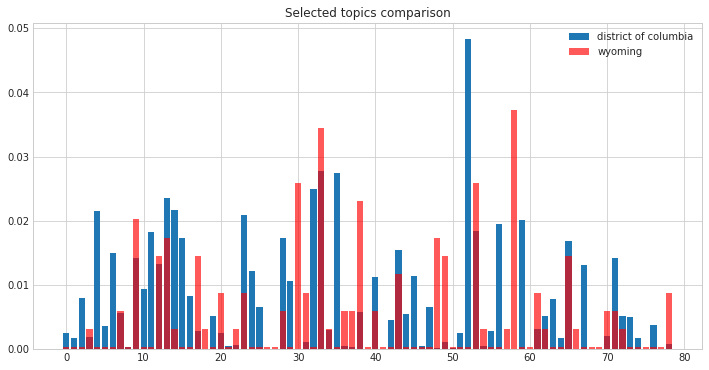

In [137]:
import seaborn as sns
sns.set_style("whitegrid")
author_id = 8
fig = plt.figure(figsize=(12,6))
plt.bar(range(len(good_topics_union)),  normalized_AT[author_id,good_topics_union],label=author_name[author_id])
author_id = 50
plt.bar(range(len(good_topics_union)), normalized_AT[author_id,good_topics_union],color='r',alpha=0.65,label=author_name[author_id])
plt.legend()
plt.title("Selected topics comparison")
# plt.xticks(np.arange(n_topic)+0.5, ['\n'.join(get_top_words(model.TW, voca, k, 10)) for k in range(n_topic)])
# plt.xticks(np.arange(n_topic)+0.5, [k for k in range(n_topic)])
plt.show()

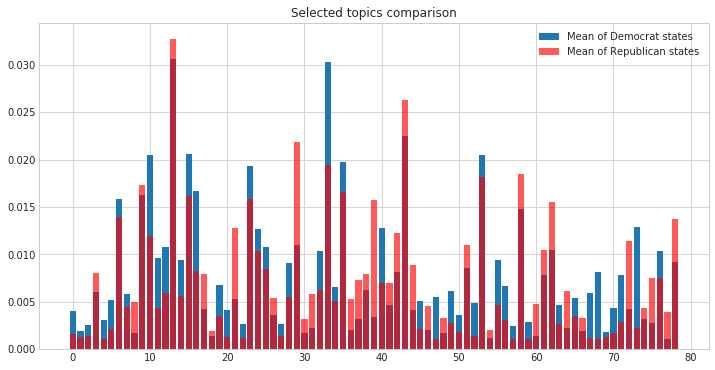

In [140]:
import seaborn as sns
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.bar(range(len(good_topics_union)), np.array(blue_means)[good_topics_union],label='Mean of Democrat states')
plt.bar(range(len(good_topics_union)), np.array(red_means)[good_topics_union],color='r',alpha=0.65,label='Mean of Republican states')
plt.legend()
plt.title("Selected topics comparison")
# plt.xticks(np.arange(n_topic)+0.5, ['\n'.join(get_top_words(model.TW, voca, k, 10)) for k in range(n_topic)])
# plt.xticks(np.arange(n_topic)+0.5, [k for k in range(n_topic)])
plt.show()

In [154]:
# good_topics_red

In [144]:
#red
k=290
get_top_words(model.TW, voca, k, 30)

array(['todddracula', 'dog', 'dtmag', 'vodka', 'likely', 'stare',
       'celebrating', 'jbzfnzsc', 'correctly', 'casting', 'nba', 'pulled',
       'protesters', 'pet', 'bitches', 'entry', 'idk', 'iwcdfytqf',
       'podernfamily', 'overweight', 'delusional', 'music', 'vsfaoiioei',
       'browns', 'gate', 'crap', 'reduced', 'wealthy', 'controlled',
       'saudi'], dtype='<U28')

In [151]:
#red
k=211
get_top_words(model.TW, voca, k, 30)

array(['rapes', 'phillyd', 'mike_pence', 'african', 'juanita', 'trash',
       'pizza', 'cbsnews', 'crush', 'updates', 'knew', 'double', 'senate',
       'sometimes', 'reporters', 'later', 'counting', 'vbklai',
       'battleground', 'sound', 'bfraser', 'definition', 'barack',
       'staff', 'football', 'stronger', 'dumb', 'outcome', 'score',
       'leodunson'], dtype='<U28')

In [153]:
#red
k=176
get_top_words(model.TW, voca, k, 30)

array(['murder', 'jill', 'spend', 'percent', 'skip', 'gregorybrothers',
       'skin', 'covered', 'elementary', 'league', 'depresseddarth',
       'killing', 'carter', 'ignorant', 'passing', 'forecast',
       'increasing', 'stone', 'impression', 'green', 'markets', 'grew',
       'sanity', 'annoying', 'factor', 'premiums', 'mood', 'yuge',
       'refusing', 'stevenwhirsch'], dtype='<U28')

In [146]:
#blue
k=33
get_top_words(model.TW, voca, k, 30)

array(['endorses', 'celebrity', 'arena', 'globeopinion', 'type', 'screen',
       'catch', 'leaving', 'including', 'glass', 'greatest', 'muaspoeob',
       'hair', 'citizens', 'term', 'vpdebate', 'worked', 'fool',
       'analysis', 'english', 'scrum', 'included', 'adult', 'star',
       'nafta', 'interested', 'badhombres', 'aka', 'mistake',
       'ariannahuff'], dtype='<U28')

In [148]:
#blue
k=142
get_top_words(model.TW, voca, k, 30)

array(['worried', 'fix', 'machine', 'ones', 'text', 'trashvis', 'total',
       'kzftvi', 'update', 'months', 'dems', 'prisonplanet', 'ugly',
       'debaten', 'bloomberg', 'ran', 'should', 'helps',
       'askaboutabortion', 'rqtvoii', 'greatest', 'agitators', 'loan',
       'assholes', 'cards', 'pers', 'near', 'jerusalem', 'opinions',
       'twice'], dtype='<U28')

In [149]:
#blue
k=112
get_top_words(model.TW, voca, k, 30)

array(['measured', 'explain', 'saudi', 'yemen', 'row', 'celebrating',
       'mittromney', 'drunks', 'fawfulfan', 'helpful', 'nrulycw',
       'opposed', 'noted', 'philosoraptor', 'busters', 'kailijoy', 'huma',
       'losses', 'bought', 'hungry', 'bottles', 'lesson', 'metro',
       'investigation', 'angela_rye', 'controlled', 'whining', 'pussies',
       'employers', 'roll'], dtype='<U28')

In [62]:
std_cut=0.05
interest_cross_blue=[]
for n in np.arange(len(blue_means)):
    if (blue_means[n]>0.001) and (blue_means[n]>topic_means[n]+std_cut*topic_stds[n]) and (red_means[n]>0.001) and (red_means[n]<topic_means[n]-std_cut*topic_stds[n]):
        interest_cross_blue.append(n)

In [63]:
interest_cross_red=[]
for n in np.arange(len(red_means)):
    if (blue_means[n]>0.001) and (blue_means[n]<topic_means[n]-std_cut*topic_stds[n]) and (red_means[n]>0.001) and (red_means[n]>topic_means[n]+std_cut*topic_stds[n]):
        interest_cross_red.append(n)

In [64]:
good_topics_all=np.arange(normalized_AT.shape[1])

good_topics_union=np.array(list(set(interest_cross_blue).union(set(interest_cross_red))))

good_topics_blue=interest_cross_blue

good_topics_red=interest_cross_red

In [65]:
#n_doc,n_topic,n_vocab,max_iter,'rf all topics ','NN red all topics ','NN blue all topics ','rf union topics ',
#'NN red union topics ','NN blue union topics ','rf red topics ','NN red red topics ','NN blue red topics '
#'rf blue topics ','NN red blue topics ','NN blue blue topics '

In [74]:
temp_param=[n_doc,n_topic,n_voca,max_iter]

In [73]:
topics=good_topics_all
lda_pred=log_reg(topics)

In [72]:
temp_res=[]

topics=good_topics_all
lda_pred=log_reg(topics)
target_red=np.array(red_means)[topics]
target_blue=np.array(blue_means)[topics]
print('rf all topics ', simple_rank_loss(new_truth,lda_pred))
temp_res.append(simple_rank_loss(new_truth,lda_pred))
print('NN red all topics ', simple_rank_loss(new_truth,NN(topics,target_red)))
temp_res.append( simple_rank_loss(new_truth,NN(topics,target_red)))
print('NN blue all topics ', simple_rank_loss(new_truth,NN(topics,target_blue)[::-1]))
temp_res.append(simple_rank_loss(new_truth,NN(topics,target_blue)[::-1]))

topics=good_topics_union
lda_pred=log_reg(topics)
target_red=np.array(red_means)[topics]
target_blue=np.array(blue_means)[topics]
print('rf union topics ', simple_rank_loss(new_truth,lda_pred))
temp_res.append(simple_rank_loss(new_truth,lda_pred))
print('NN red union topics ', simple_rank_loss(new_truth,NN(topics,target_red)))
temp_res.append( simple_rank_loss(new_truth,NN(topics,target_red)))
print('NN blue union topics ', simple_rank_loss(new_truth,NN(topics,target_blue)[::-1]))
temp_res.append(simple_rank_loss(new_truth,NN(topics,target_blue)[::-1]))

topics=good_topics_red
lda_pred=log_reg(topics)
target_red=np.array(red_means)[topics]
target_blue=np.array(blue_means)[topics]
print('rf red topics ', simple_rank_loss(new_truth,lda_pred))
temp_res.append(simple_rank_loss(new_truth,lda_pred))
print('NN red red topics ', simple_rank_loss(new_truth,NN(topics,target_red)))
temp_res.append( simple_rank_loss(new_truth,NN(topics,target_red)))
print('NN blue red topics ', simple_rank_loss(new_truth,NN(topics,target_blue)[::-1]))
temp_res.append(simple_rank_loss(new_truth,NN(topics,target_blue)[::-1]))

topics=good_topics_blue
lda_pred=log_reg(topics)
target_red=np.array(red_means)[topics]
target_blue=np.array(blue_means)[topics]
print('rf blue topics ', simple_rank_loss(new_truth,lda_pred))
temp_res.append(simple_rank_loss(new_truth,lda_pred))
print('NN red blue topics ', simple_rank_loss(new_truth,NN(topics,target_red)))
temp_res.append( simple_rank_loss(new_truth,NN(topics,target_red)))
print('NN blue blue topics ', simple_rank_loss(new_truth,NN(topics,target_blue)[::-1]))
temp_res.append(simple_rank_loss(new_truth,NN(topics,target_blue)[::-1]))

rf all topics  0.7355371900826446
NN red all topics  0.7024793388429752
NN blue all topics  0.4214876033057851
rf union topics  0.71900826446281
NN red union topics  0.6694214876033058
NN blue union topics  0.5371900826446281
rf red topics  0.6528925619834711
NN red red topics  0.6363636363636364
NN blue red topics  0.45454545454545453
rf blue topics  0.7355371900826446
NN red blue topics  0.5867768595041323
NN blue blue topics  0.5702479338842975


In [13]:
flip_states={}
for pair in states.items():
    flip_states[pair[1]]=pair[0]

In [76]:
swing_pred=[]
for state in lda_pred:
    if state in swing_states:
        swing_pred.append(state)

In [99]:
abb_rank=[flip_states[s] for s in swing_pred] 

rank_df=pd.DataFrame({'states':abb_rank,'rank':np.arange(len(abb_rank))})

import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(186,5,5)'],[0.4, 'rgb(175, 114, 114)'],\
            [0.6, 'rgb(119, 159, 175)'],[1.0, 'rgb(35, 130, 168)']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = rank_df['states'],
        z = rank_df['rank'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Rank")
        ) ]

layout = dict(
        title = 'Topic Modeling Prediction of GOP favorability ranking',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [93]:
swing_truth=[]
for state in new_truth:
    if state in swing_states:
        swing_truth.append(state)

In [155]:
abb_rank=[flip_states[s] for s in swing_truth] 
rank_df=pd.DataFrame({'states':abb_rank,'rank':np.arange(len(abb_rank))})

import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(186,5,5)'],[0.4, 'rgb(175, 114, 114)'],\
            [0.6, 'rgb(119, 159, 175)'],[1.0, 'rgb(35, 130, 168)']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = rank_df['states'],
        z = rank_df['rank'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Rank")
        ) ]

layout = dict(
        title = 'Real GOP favorability ranking in 2016 election',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [80]:
swing_wpred=[]
for state in new_wpred:
    if state in swing_states:
        swing_wpred.append(state)

In [101]:
abb_rank=[flip_states[s] for s in swing_wpred] 

rank_df=pd.DataFrame({'states':abb_rank,'rank':np.arange(len(abb_rank))})

import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(186,5,5)'],[0.4, 'rgb(175, 114, 114)'],\
            [0.6, 'rgb(119, 159, 175)'],[1.0, 'rgb(35, 130, 168)']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = rank_df['states'],
        z = rank_df['rank'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Rank")
        ) ]

layout = dict(
        title = 'Human Expert Prediction of GOP favorability ranking',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [107]:
FTpred=['north dakota',
 'south dakota',
 'minnesota',
 'nebraska',
 'mississippi',
 'arkansas',
 'wyoming',
 'maryland',
 'pennsylvania',
 'delaware',
 'indiana',
 'texas',
 'missouri',
 'kansas',
 'michigan',
 'massachusetts',
 'louisiana',
 'hawaii',
 'illinois',
 'new york',
 'arizona',
 'montana',
 'maine',
 'wisconsin',
 'vermont',
 'new hampshire',
 'south carolina',
 'ohio',
 'rhode island',
 'florida',
 'colorado',
 'oklahoma',
 'georgia',
 'alaska',
 'virginia',
 'alabama',
 'iowa',
 'new jersey',
 'west virginia',
 'tennessee',
 'california',
 'connecticut',
 'district of columbia',
 'oregon',
 'north carolina',
 'kentucky',
 'washington',
 'idaho',
 'new mexico',
 'nevada',
 'utah']
swing_ftpred=[]
for state in FTpred:
    if state in swing_states:
        swing_ftpred.append(state)
        
abb_rank=[flip_states[s] for s in swing_ftpred] 

rank_df=pd.DataFrame({'states':abb_rank,'rank':np.arange(len(abb_rank))})

import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(186,5,5)'],[0.4, 'rgb(175, 114, 114)'],\
            [0.6, 'rgb(119, 159, 175)'],[1.0, 'rgb(35, 130, 168)']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = rank_df['states'],
        z = rank_df['rank'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Rank")
        ) ]

layout = dict(
        title = 'FastText Prediction of GOP favorability ranking',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [105]:
swing_ftpred

['pennsylvania',
 'michigan',
 'wisconsin',
 'new hampshire',
 'ohio',
 'florida',
 'colorado',
 'virginia',
 'iowa',
 'north carolina',
 'nevada']

In [106]:
swing_truth

['iowa',
 'ohio',
 'north carolina',
 'florida',
 'pennsylvania',
 'wisconsin',
 'michigan',
 'new hampshire',
 'nevada',
 'colorado',
 'virginia']

In [181]:
this_res=temp_param+temp_res
with open('ATM_results.pkl','rb') as file:
    last_res=pkl.load(file)

In [182]:
last_res.append(this_res)
with open('ATM_results.pkl','wb') as file:
    pkl.dump(last_res,file)

In [109]:

def simple_rank_loss(new_truth,lda_pred):
    swing_truth=[]
    for state in new_truth:
        if state in swing_states:
            swing_truth.append(state)
    
    swing_pred=[]
    for state in lda_pred:
        if state in swing_states:
            swing_pred.append(state)
    
    new_truth=swing_truth
    lda_pred=swing_pred
    
    truth_rank={}
    n=0
    for state in new_truth:
        truth_rank[state]=n
        n+=1


    truth_binary_rank={}
    for k in range(len(new_truth)):
        for j in range(len(new_truth)):
            if truth_rank[new_truth[k]]<truth_rank[new_truth[j]]:
                truth_binary_rank[(new_truth[k],new_truth[j])]=1
            else:
                truth_binary_rank[(new_truth[k],new_truth[j])]=0


    pred_rank={}
    n=0
    for state in lda_pred:
        pred_rank[state]=n
        n+=1


    pred_binary_rank={}
    for k in range(len(lda_pred)):
        for j in range(len(lda_pred)):
            if pred_rank[lda_pred[k]]<pred_rank[lda_pred[j]]:
                pred_binary_rank[(lda_pred[k],lda_pred[j])]=1
            else:
                pred_binary_rank[(lda_pred[k],lda_pred[j])]=0

    assert len(truth_binary_rank.values()) == len(pred_binary_rank.values())

    correct=0
    for key in pred_binary_rank.keys():
        if pred_binary_rank[key] == truth_binary_rank[key]:
            correct+=1

    return correct/len(pred_binary_rank.keys())

In [110]:
simple_rank_loss(new_truth,new_wpred)

0.7851239669421488

Bootstrap ends

In [68]:
def NN(good_topics,target):
    scores = normalized_AT[:,good_topics] @ target

    lda_pred=[]
    ranked_pairs = sorted([(i,scores[i]) for i in range(len(scores))],key=lambda pair:pair[1],reverse=True)
    for pair in ranked_pairs:
#         print(author_name[pair[0]])
        lda_pred.append(author_name[pair[0]].lower())
    return lda_pred

def log_reg(good_topics):
    X_red=normalized_AT[red_states_ids,:][:,good_topics]
    Y_red=np.zeros((X_red.shape[0]))+1

    X_blue=normalized_AT[blue_states_ids,:][:,good_topics]
    Y_blue=np.zeros((X_blue.shape[0]))

    Y=np.concatenate((Y_red,Y_blue),axis=0)

    X=np.concatenate((X_red,X_blue),axis=0)

    cl = RandomForestClassifier(n_estimators=1000, max_depth=5,random_state=0)
#     cl = LogisticRegression(C=1e5, solver='lbfgs')

    cl.fit(X, Y)
    score_rank=sorted(list(zip(author_name,cl.predict_proba(normalized_AT[:,good_topics])[:,1])),key=lambda x: x[1],reverse=True)
    lda_pred=[]
    for pair in score_rank:
        lda_pred.append(author_name[pair[0]].lower())
    return lda_pred